#  Features - Data Cleaning & Feature Engineering

This notebook focuses on cleaning the data and creating features for modeling in the Forecast + Alerting pipeline.

##  Setup & Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import warnings

warnings.filterwarnings('ignore')


# Add project root to path

project_root = os.getcwd()

if os.path.basename(project_root) in ['pipeline_walkthrough', 'notebooks']:

    project_root = os.path.dirname(project_root)
sys.path.append(project_root)


# Import our pipeline modules

from src.loader import load_operations_data, load_site_meta, merge_data
from src.features import clean_data, engineer_features


# Set up plotting style

plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)

print(" All imports successful!")

 All imports successful!


##  Load Data (from EDA)

Load the merged dataset for processing.

In [2]:
# Load the raw data (assuming this was done in EDA)
print(" Loading operations data...")
ops_df = load_operations_data()
print(f" Operations data loaded: {ops_df.shape[0]} rows, {ops_df.shape[1]} columns")

print("\n Loading site metadata...")
meta_df = load_site_meta()
print(f" Site metadata loaded: {meta_df.shape[0]} rows, {meta_df.shape[1]} columns")

print("\n Merging datasets...")
df = merge_data(ops_df, meta_df)
print(f" Merged dataset: {df.shape[0]} rows, {df.shape[1]} columns")
df

 Loading operations data...
Looking for file at: c:\Users\hardi\OneDrive\Desktop\task\logic_leap_horizon_datasets\operations_daily_365d.csv
File exists: True
 Operations data loaded: 1460 rows, 13 columns

 Loading site metadata...
Looking for file at: c:\Users\hardi\OneDrive\Desktop\task\logic_leap_horizon_datasets\site_meta.csv
File exists: True
 Site metadata loaded: 4 rows, 4 columns

 Merging datasets...
 Merged dataset: 1460 rows, 16 columns


,date,site_id,units_produced,downtime_minutes,power_kwh,rework_units,defects_ppm,staff_count,material_cost_per_unit,price_per_unit,temperature_c,rainfall_mm,holiday_flag,region,commissioned_year,shift_hours_per_day
0,2025-01-01,S1,1280,34,4211,27,453,56,71.94,96.04,21.7,0.0,0,South,2018,20
1,2025-01-02,S1,1249,193,5471,40,480,55,71.87,95.90,22.4,0.0,0,South,2018,20
2,2025-01-03,S1,1163,43,4178,33,454,53,72.04,96.11,22.7,0.0,0,South,2018,20
3,2025-01-04,S1,1348,32,4554,35,387,54,72.26,95.99,22.7,0.0,0,South,2018,20
4,2025-01-05,S1,0,0,0,0,0,0,0.00,0.00,21.9,0.0,1,South,2018,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2025-12-27,S4,1231,67,4378,30,596,53,72.91,99.50,23.9,0.0,0,East,2015,20
1456,2025-12-28,S4,1122,62,3853,16,509,53,72.82,99.61,24.5,0.0,0,East,2015,20
1457,2025-12-29,S4,1515,77,5032,41,490,55,72.69,99.66,22.2,0.0,0,East,2015,20
1458,2025-12-30,S4,1259,66,4250,33,417,56,73.22,99.56,23.3,0.0,0,East,2015,20


##  Phase 2: Data Cleaning & Feature Engineering



In [3]:
# Clean the data
print(" Cleaning data...")
df_clean = clean_data(df)
print(" Data cleaned. Added holiday flags.")


# Check for holidays
holiday_count = df_clean['is_holiday'].sum()
print(f" Identified {holiday_count} holiday periods")
df_clean

 Cleaning data...
 Data cleaned. Added holiday flags.
 Identified 96 holiday periods


,date,site_id,units_produced,downtime_minutes,power_kwh,rework_units,defects_ppm,staff_count,material_cost_per_unit,price_per_unit,temperature_c,rainfall_mm,holiday_flag,region,commissioned_year,shift_hours_per_day,is_holiday
0,2025-01-01,S1,1280,34,4211,27,453,56,71.94,96.04,21.7,0.0,0,South,2018,20,False
1,2025-01-02,S1,1249,193,5471,40,480,55,71.87,95.90,22.4,0.0,0,South,2018,20,False
2,2025-01-03,S1,1163,43,4178,33,454,53,72.04,96.11,22.7,0.0,0,South,2018,20,False
3,2025-01-04,S1,1348,32,4554,35,387,54,72.26,95.99,22.7,0.0,0,South,2018,20,False
4,2025-01-05,S1,0,0,0,0,0,0,0.00,0.00,21.9,0.0,1,South,2018,20,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2025-12-27,S4,1231,67,4378,30,596,53,72.91,99.50,23.9,0.0,0,East,2015,20,False
1456,2025-12-28,S4,1122,62,3853,16,509,53,72.82,99.61,24.5,0.0,0,East,2015,20,False
1457,2025-12-29,S4,1515,77,5032,41,490,55,72.69,99.66,22.2,0.0,0,East,2015,20,False
1458,2025-12-30,S4,1259,66,4250,33,417,56,73.22,99.56,23.3,0.0,0,East,2015,20,False


In [4]:
# Feature engineering
print("\n Engineering features...")
df_features = engineer_features(df_clean)


original_cols = len(df.columns)
new_cols = len(df_features.columns)
engineered_cols = new_cols - original_cols


print(" Feature engineering complete!")
print(f" Original columns: {original_cols}")
print(f" New columns: {new_cols}")
print(f" Engineered features: {engineered_cols}")


# Show new features
new_features = [col for col in df_features.columns if col not in df.columns]
print("\n New Features Created:")
for i, feature in enumerate(new_features, 1):
    print(f"{i:2d}. {feature}")


 Engineering features...
 Feature engineering complete!
 Original columns: 16
 New columns: 38
 Engineered features: 22

 New Features Created:
 1. is_holiday
 2. day_of_week
 3. month
 4. quarter
 5. day_of_year
 6. week_of_year
 7. units_produced_lag_1
 8. power_kwh_lag_1
 9. units_produced_lag_7
10. power_kwh_lag_7
11. units_produced_lag_14
12. power_kwh_lag_14
13. units_produced_lag_30
14. power_kwh_lag_30
15. units_produced_roll_mean_7
16. power_kwh_roll_mean_7
17. units_produced_roll_mean_14
18. power_kwh_roll_mean_14
19. units_produced_roll_mean_30
20. power_kwh_roll_mean_30
21. efficiency
22. downtime_ratio


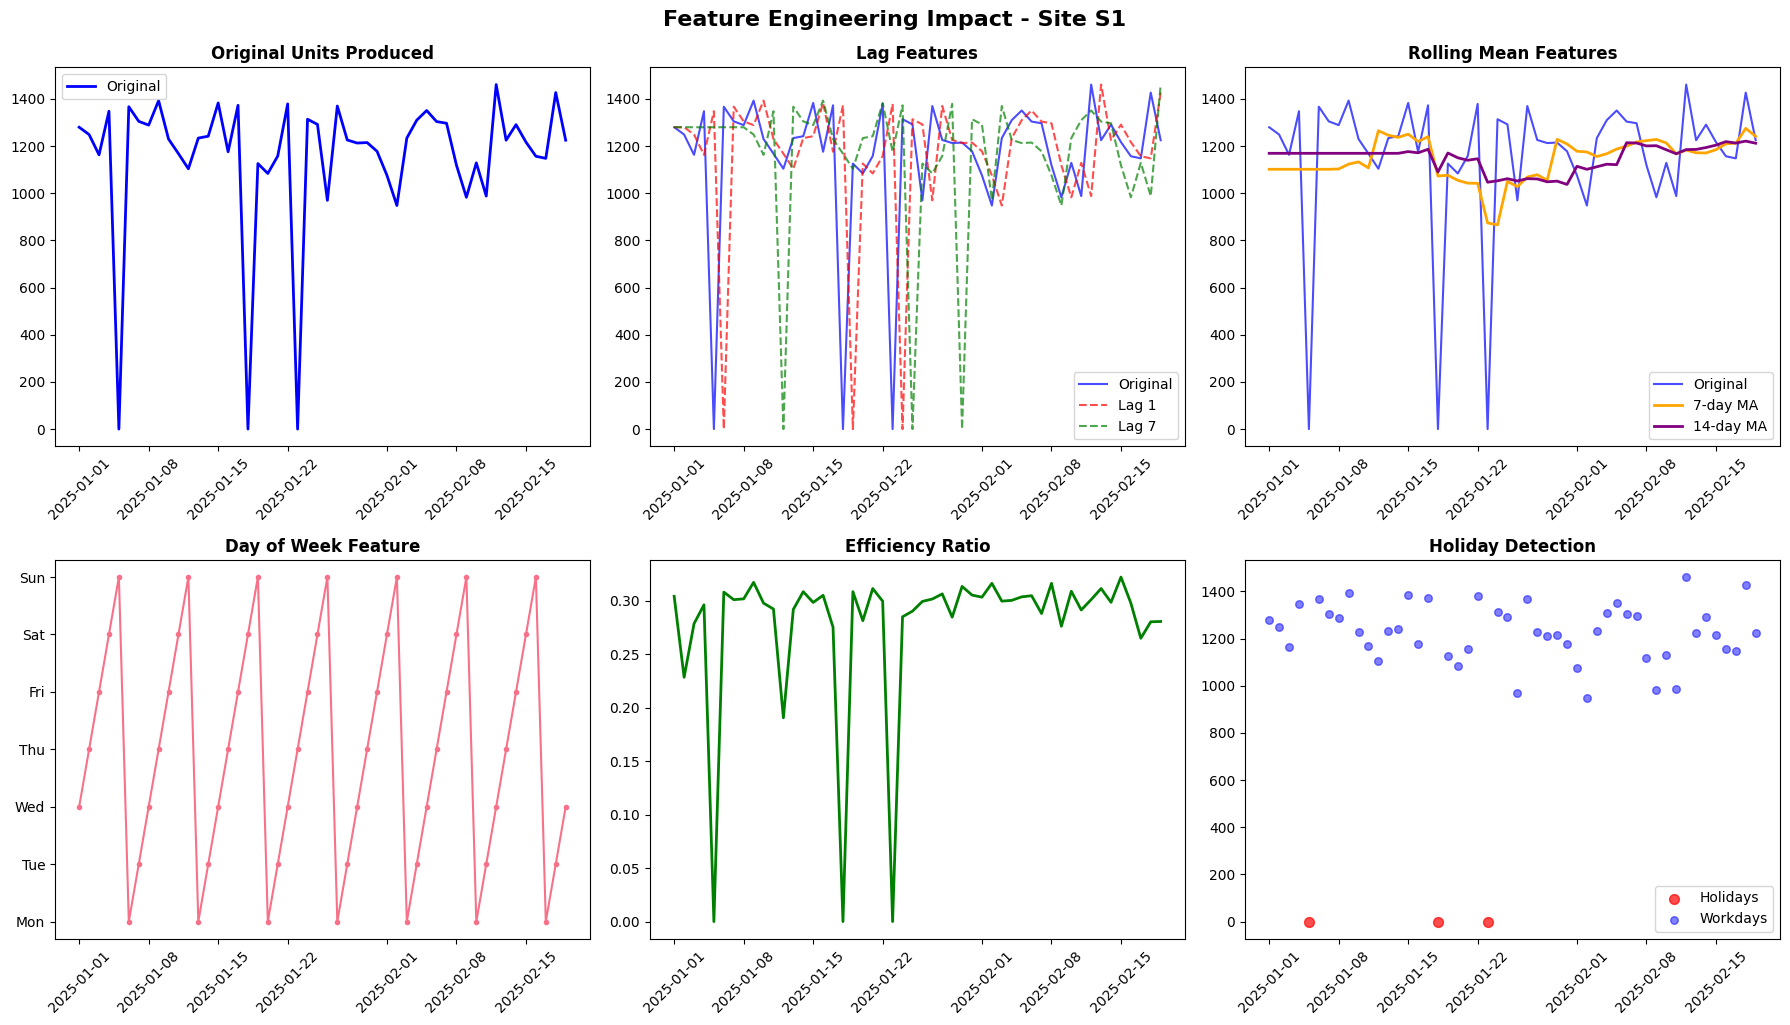


 Feature Engineering Insights:
 Lag features capture temporal dependencies
 Rolling means smooth out noise and show trends
 Day-of-week captures weekly patterns
 Efficiency ratio combines production and power data
 Holiday detection identifies special periods


In [5]:
# Visualize feature engineering impact
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()


# Original vs engineered features
site = 'S1'
site_data = df_features[df_features['site_id'] == site].head(50)  # First 50 days


# 1. Original units
axes[0].plot(site_data['date'], site_data['units_produced'], 'b-', linewidth=2, label='Original')
axes[0].set_title('Original Units Produced', fontweight='bold')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)


# 2. Lag features
axes[1].plot(site_data['date'], site_data['units_produced'], 'b-', alpha=0.7, label='Original')
axes[1].plot(site_data['date'], site_data['units_produced_lag_1'], 'r--', alpha=0.7, label='Lag 1')
axes[1].plot(site_data['date'], site_data['units_produced_lag_7'], 'g--', alpha=0.7, label='Lag 7')
axes[1].set_title('Lag Features', fontweight='bold')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)


# 3. Rolling means
axes[2].plot(site_data['date'], site_data['units_produced'], 'b-', alpha=0.7, label='Original')
axes[2].plot(site_data['date'], site_data['units_produced_roll_mean_7'], 'orange', linewidth=2, label='7-day MA')
axes[2].plot(site_data['date'], site_data['units_produced_roll_mean_14'], 'purple', linewidth=2, label='14-day MA')
axes[2].set_title('Rolling Mean Features', fontweight='bold')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)


# 4. Temporal features
axes[3].plot(site_data['date'], site_data['day_of_week'], 'o-', markersize=3)
axes[3].set_title('Day of Week Feature', fontweight='bold')
axes[3].set_yticks([0, 1, 2, 3, 4, 5, 6])
axes[3].set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[3].tick_params(axis='x', rotation=45)


# 5. Efficiency feature
axes[4].plot(site_data['date'], site_data['efficiency'], 'g-', linewidth=2)
axes[4].set_title('Efficiency Ratio', fontweight='bold')
axes[4].tick_params(axis='x', rotation=45)


# 6. Holiday flag
holiday_dates = site_data[site_data['is_holiday'] == True]['date']
non_holiday_dates = site_data[site_data['is_holiday'] == False]['date']
axes[5].scatter(holiday_dates, site_data.loc[site_data['is_holiday'] == True, 'units_produced'], 
               color='red', label='Holidays', s=50, alpha=0.7)
axes[5].scatter(non_holiday_dates, site_data.loc[site_data['is_holiday'] == False, 'units_produced'], 
               color='blue', label='Workdays', s=30, alpha=0.5)
axes[5].set_title('Holiday Detection', fontweight='bold')
axes[5].legend()
axes[5].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.suptitle(f'Feature Engineering Impact - Site {site}', fontsize=16, fontweight='bold', y=1.02)
plt.show()


print("\n Feature Engineering Insights:")
print(" Lag features capture temporal dependencies")
print(" Rolling means smooth out noise and show trends")
print(" Day-of-week captures weekly patterns")
print(" Efficiency ratio combines production and power data")
print(" Holiday detection identifies special periods")